In [161]:
#algorithm
#https://www.kaggle.com/stefanbergstein/keras-deep-learning-on-titanic-data

In [162]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from itertools import combinations
from sklearn import preprocessing as pp
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

In [163]:
# machine learning
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [164]:
# utils
import time
from datetime import timedelta

# some configuration flags and variables
verbose=0 # Use in classifier

# define random seed for reproducibility
seed = 69
np.random.seed(seed)

In [165]:
#read files
#Reading train file:
train = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Titanic-Datasets/master/titanic_train.csv')
#Reading test file:
test = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Titanic-Datasets/master/titanic_test.csv')

In [166]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [167]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [168]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [169]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [170]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [171]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [172]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(4)

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000


In [173]:
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(4)

,Total,Percent
Cabin,327,0.782297
Age,86,0.205742
Fare,1,0.002392
Embarked,0,0.000000


In [174]:
# fill up missing values with mode
train['Cabin'] = train['Cabin'].fillna(train['Cabin'].mode()[0])
test['Cabin'] = test['Cabin'].fillna(test['Cabin'].mode()[0])

train['Fare'] = train['Fare'].fillna(train['Fare'].mode()[0])
test['Fare'] = test['Fare'].fillna(test['Fare'].mode()[0])

train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode()[0])

#fill missing values with median
train['Age'] = train['Age'].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(test['Age'].median())

In [175]:
train.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0)

In [176]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [177]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,B57 B59 B63 B66,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,B57 B59 B63 B66,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,B57 B59 B63 B66,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,B57 B59 B63 B66,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,B57 B59 B63 B66,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,B57 B59 B63 B66,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,B57 B59 B63 B66,S
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,B57 B59 B63 B66,S


In [178]:
#take title from name
train['Title'] = train['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
test['Title'] = test['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())

In [179]:
title=train.groupby('Title')['Survived'].sum().reset_index()
title

,Title,Survived
0,Capt,0
1,Col,1
2,Don,0
3,Dr,3
4,Jonkheer,0
5,Lady,1
6,Major,1
7,Master,23
8,Miss,127
9,Mlle,2


In [180]:
title1={'Capt':1, 'Col':2, 'Don':3, 'Dr':4,'Jonkheer':5, 'Lady':6, 'Major': 7, 'Master':8, 'Miss':9, 
        'Mlle':10, 'Mme':11, 'Mr':12, 'Mrs':13, 'Ms':14, 'Rev':15, 'Sir':16, 'the Countess':17, 'Dona':18}
train.Title=train.Title.map(title1)
test.Title=test.Title.map(title1)

In [181]:
title2=train.groupby('Title')['Survived'].sum().reset_index()
title2

,Title,Survived
0,1,0
1,2,1
2,3,0
3,4,3
4,5,0
5,6,1
6,7,1
7,8,23
8,9,127
9,10,2


In [182]:
train['Title'].isnull().sum().sum(), test['Title'].isnull().sum().sum()

(0, 0)

In [183]:
pclass=train.groupby('Pclass')['Survived'].sum().reset_index()
pclass

,Pclass,Survived
0,1,136
1,2,87
2,3,119


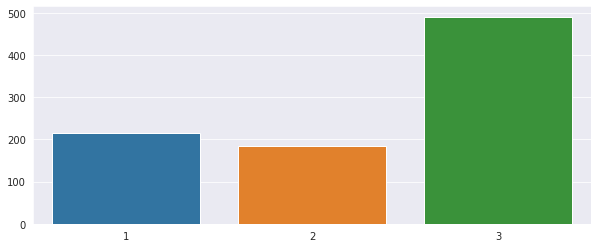

In [184]:
pclass = train.Pclass.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=pclass.index, y=pclass.values)
plt.show()

In [185]:
bins4 = [-1., 1., 2., 3. + np.inf]
names4 = ['1','2', '3']

train['Class_Range'] = pd.cut(train['Pclass'], bins4, labels=names4)
test['Class_Range'] = pd.cut(test['Pclass'], bins4, labels=names4)

In [186]:
class_range=train.groupby('Class_Range')['Survived'].sum().reset_index()
class_range

,Class_Range,Survived
0,1,136
1,2,87
2,3,119


In [187]:
train['Pclass'].isnull().sum().sum(), test['Pclass'].isnull().sum().sum()

(0, 0)

In [188]:
sex=train.groupby('Sex')['Survived'].sum().reset_index()
sex

,Sex,Survived
0,female,233
1,male,109


In [189]:
sex1={'female':1, 'male':0}
train.Sex=train.Sex.map(sex1)
test.Sex=test.Sex.map(sex1)

In [190]:
sex2=train.groupby('Sex')['Survived'].sum().reset_index()
sex2

,Sex,Survived
0,0,109
1,1,233


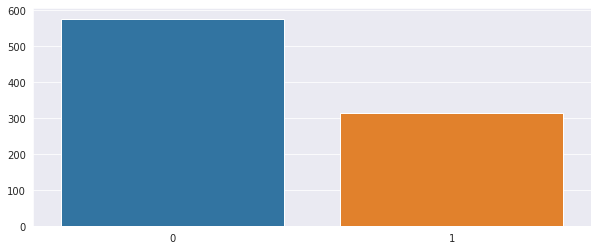

In [191]:
sex = train.Sex.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=sex.index, y=sex.values)
plt.show()

In [192]:
bins6 = [-1., 0, 1. +np.inf]
names6 = ['0','1']

train['Sex_Range'] = pd.cut(train['Sex'], bins6, labels=names6)
test['Sex_Range'] = pd.cut(test['Sex'], bins6, labels=names6)

In [193]:
sex1=train.groupby('Sex_Range')['Survived'].sum().reset_index()
sex1

,Sex_Range,Survived
0,0,109
1,1,233


In [194]:
train.Sex_Range.isnull().sum(), test.Sex_Range.isnull().sum()

(0, 0)

In [195]:
age=train.groupby('Age')['Survived'].sum().reset_index()
age

,Age,Survived
0,0.42,1
1,0.67,1
2,0.75,2
3,0.83,2
4,0.92,1
...,...,...
83,70.00,0
84,70.50,0
85,71.00,0
86,74.00,0


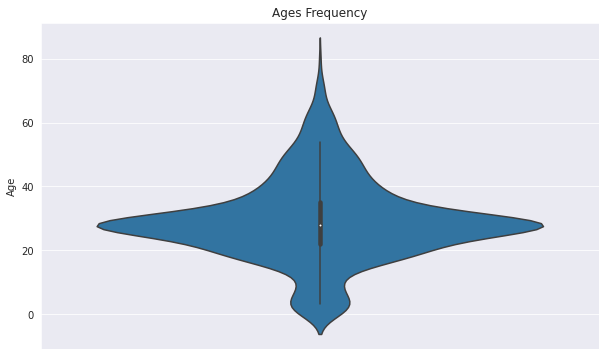

In [196]:
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["Age"])
plt.show()

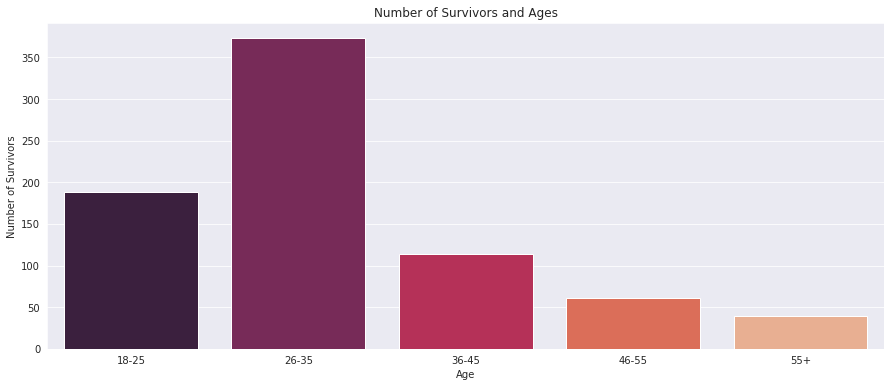

In [197]:
age18_25 = train.Age[(train.Age <= 25) & (train.Age >= 18)]
age26_35 = train.Age[(train.Age <= 35) & (train.Age >= 26)]
age36_45 = train.Age[(train.Age <= 45) & (train.Age >= 36)]
age46_55 = train.Age[(train.Age <= 55) & (train.Age >= 46)]
age55above = train.Age[train.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Survivors and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Survivors")
plt.show()

In [198]:
bins = [0., 18., 35., 64., 65.+ np.inf]
names = ['child','young adult', 'middle aged', 'pensioner']

train['Age_Range'] = pd.cut(train['Age'], bins, labels=names)
test['Age_Range'] = pd.cut(test['Age'], bins, labels=names)

In [199]:
age_range=train.groupby('Age_Range')['Survived'].sum().reset_index()
age_range

,Age_Range,Survived
0,child,70
1,young adult,189
2,middle aged,82
3,pensioner,1


In [200]:
age_range1={'child':1,'young adult':2, 'middle aged':3, 'pensioner': 4}
train.Age_Range=train.Age_Range.map(age_range1)
test.Age_Range=test.Age_Range.map(age_range1)

In [201]:
train.Age_Range.isnull().sum(), test.Age_Range.isnull().sum()

(0, 0)

In [202]:
age_range=train.groupby('Age_Range')['Survived'].sum().reset_index()
age_range

,Age_Range,Survived
0,1,70
1,2,189
2,3,82
3,4,1


In [203]:
family=train.groupby('SibSp')['Survived'].sum().reset_index()
family

,SibSp,Survived
0,0,210
1,1,112
2,2,13
3,3,4
4,4,3
5,5,0
6,8,0


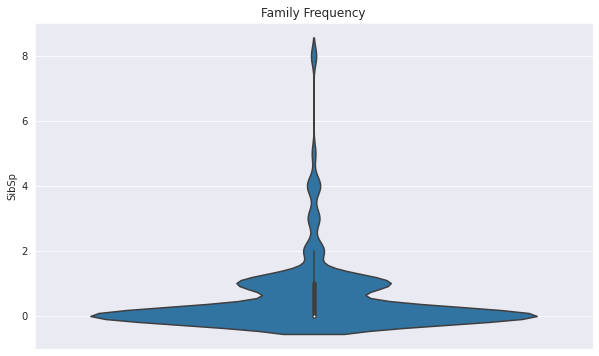

In [204]:
plt.figure(figsize=(10,6))
plt.title("Family Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["SibSp"])
plt.show()

In [205]:
bins2 = [-1., 0., 1., 2., 3., 4., 5., 8.+ np.inf]
names2 = ['0','1', '2', '3', '4', '5', '8']

train['Family_Range'] = pd.cut(train['SibSp'], bins2, labels=names2)
test['Family_Range'] = pd.cut(test['SibSp'], bins2, labels=names2)

In [206]:
family1=train.groupby('Family_Range')['Survived'].sum().reset_index()
family1

,Family_Range,Survived
0,0,210
1,1,112
2,2,13
3,3,4
4,4,3
5,5,0
6,8,0


In [207]:
parch=train.groupby('Parch')['Survived'].sum().reset_index()
parch

,Parch,Survived
0,0,233
1,1,65
2,2,40
3,3,3
4,4,0
5,5,1
6,6,0


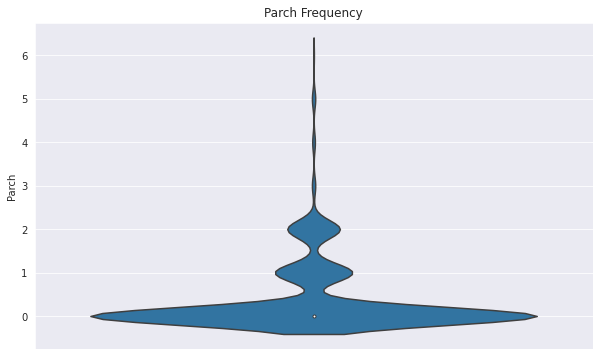

In [208]:
plt.figure(figsize=(10,6))
plt.title("Parch Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["Parch"])
plt.show()

In [209]:
bins3 = [-1., 0., 1., 2., 3., 4., 5., 6.+ np.inf]
names3 = ['0','1', '2', '3', '4', '5', '6']

train['Parch_Range'] = pd.cut(train['SibSp'], bins3, labels=names3)
test['Parch_Range'] = pd.cut(test['SibSp'], bins3, labels=names3)

In [210]:
parch1=train.groupby('Parch_Range')['Survived'].sum().reset_index()
parch1

,Parch_Range,Survived
0,0,210
1,1,112
2,2,13
3,3,4
4,4,3
5,5,0
6,6,0


In [211]:
fare=train.groupby('Fare')['Survived'].sum().reset_index()
fare

,Fare,Survived
0,0.0000,1
1,4.0125,0
2,5.0000,0
3,6.2375,0
4,6.4375,0
...,...,...
243,227.5250,3
244,247.5208,1
245,262.3750,2
246,263.0000,2


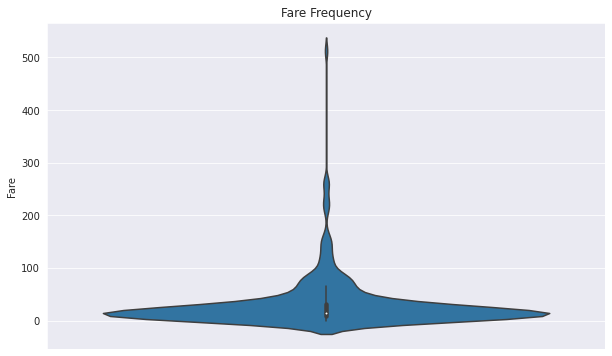

In [212]:
plt.figure(figsize=(10,6))
plt.title("Fare Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["Fare"])
plt.show()

In [213]:
bins0 = [-1., 100., 200., 300., 400., 500.+ np.inf]
names0 = ['0-99', '100-199', '200-299', '300-399', '400+']

train['Fare_Range'] = pd.cut(train['Fare'], bins0, labels=names0)
test['Fare_Range'] = pd.cut(test['Fare'], bins0, labels=names0)

In [214]:
fare_range=train.groupby('Fare_Range')['Survived'].sum().reset_index()
fare_range

,Fare_Range,Survived
0,0-99,303
1,100-199,25
2,200-299,11
3,300-399,0
4,400+,3


In [215]:
fare_range1={'0-99':1, '100-199':2, '200-299': 3, '300-399':4, '400+':5}
train.Fare_Range=train.Fare_Range.map(fare_range1)
test.Fare_Range=test.Fare_Range.map(fare_range1)

In [216]:
train.Fare_Range.isnull().sum(), test.Fare_Range.isnull().sum()

(0, 0)

In [217]:
embark=train.groupby('Embarked')['Survived'].sum().reset_index()
embark

,Embarked,Survived
0,C,93
1,Q,30
2,S,219


In [218]:
embark1={'C':1, 'Q':2, 'S': 3}
train.Embarked=train.Embarked.map(embark1)
test.Embarked=test.Embarked.map(embark1)

In [219]:
bins1 = [-1., 1., 2., 3.+ np.inf]
names1 = ['C', 'Q', 'S']

train['Embarked_Range'] = pd.cut(train['Embarked'], bins1, labels=names1)
test['Embarked_Range'] = pd.cut(test['Embarked'], bins1, labels=names1)

In [220]:
train.Embarked_Range.isnull().sum(), test.Embarked_Range.isnull().sum()

(0, 0)

In [221]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(3)

,Total,Percent
Embarked_Range,0,0.0
Fare_Range,0,0.0
Survived,0,0.0


In [222]:
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(3)

,Total,Percent
Embarked_Range,0,0.0
Fare,0,0.0
Pclass,0,0.0


In [223]:
train.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0)

In [224]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Class_Range,Sex_Range,Age_Range,Family_Range,Parch_Range,Fare_Range,Embarked_Range
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,B96 B98,3,12,3,0,2,1,1,1,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,13,1,1,3,1,1,1,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,3,9,3,1,2,0,0,1,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,3,13,1,1,2,1,1,1,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,B96 B98,3,12,3,0,2,0,0,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,B96 B98,3,15,2,0,2,0,0,1,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,3,9,1,1,2,0,0,1,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,B96 B98,3,9,3,1,2,1,1,1,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,1,12,1,0,2,0,0,1,C


In [225]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Class_Range,Sex_Range,Age_Range,Family_Range,Parch_Range,Fare_Range,Embarked_Range
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,B57 B59 B63 B66,2,12,3,0,2,0,0,1,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,B57 B59 B63 B66,3,13,3,1,3,1,1,1,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,B57 B59 B63 B66,2,12,2,0,3,0,0,1,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,B57 B59 B63 B66,3,12,3,0,2,0,0,1,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,B57 B59 B63 B66,3,13,3,1,2,1,1,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,27.0,0,0,A.5. 3236,8.0500,B57 B59 B63 B66,3,12,3,0,2,0,0,1,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,1,18,1,1,3,0,0,2,C
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,B57 B59 B63 B66,3,12,3,0,3,0,0,1,S
416,1308,3,"Ware, Mr. Frederick",0,27.0,0,0,359309,8.0500,B57 B59 B63 B66,3,12,3,0,2,0,0,1,S


In [226]:
train.dtypes

PassengerId          int64
Survived             int64
Pclass               int64
Name                object
Sex                  int64
Age                float64
SibSp                int64
Parch                int64
Ticket              object
Fare               float64
Cabin               object
Embarked             int64
Title                int64
Class_Range       category
Sex_Range         category
Age_Range         category
Family_Range      category
Parch_Range       category
Fare_Range        category
Embarked_Range    category
dtype: object

In [227]:
test.dtypes

PassengerId          int64
Pclass               int64
Name                object
Sex                  int64
Age                float64
SibSp                int64
Parch                int64
Ticket              object
Fare               float64
Cabin               object
Embarked             int64
Title                int64
Class_Range       category
Sex_Range         category
Age_Range         category
Family_Range      category
Parch_Range       category
Fare_Range        category
Embarked_Range    category
dtype: object

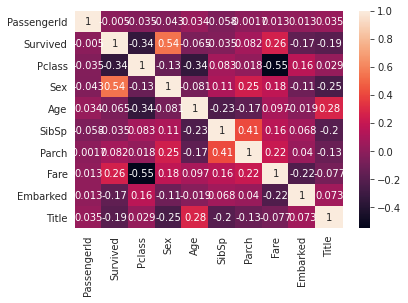

In [228]:
#create a heatmap to correlate promotion
plt.figure(figsize=(6,4))
cmap=train.corr()
sns.heatmap(cmap, annot=True)

In [229]:
# Feature selection: remove variables no longer containing relevant information
drop_elements = ['Name', 'Ticket', 'Cabin', 'Title']
train = train.drop(drop_elements, axis = 1)
test  = test.drop(drop_elements, axis = 1)

In [230]:
y = train["Survived"]
features = ["Class_Range", "Sex_Range", "Embarked_Range", "Age_Range", "Family_Range", "Parch_Range", "Fare_Range"]
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

In [231]:
X

,Class_Range_1,Class_Range_2,Class_Range_3,Sex_Range_0,Sex_Range_1,Embarked_Range_C,Embarked_Range_Q,Embarked_Range_S,Age_Range_1,Age_Range_2,Age_Range_3,Age_Range_4,Family_Range_0,Family_Range_1,Family_Range_2,Family_Range_3,Family_Range_4,Family_Range_5,Family_Range_8,Parch_Range_0,Parch_Range_1,Parch_Range_2,Parch_Range_3,Parch_Range_4,Parch_Range_5,Parch_Range_6,Fare_Range_1,Fare_Range_2,Fare_Range_3,Fare_Range_4,Fare_Range_5
0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
887,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
888,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
889,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [232]:
X_test

,Class_Range_1,Class_Range_2,Class_Range_3,Sex_Range_0,Sex_Range_1,Embarked_Range_C,Embarked_Range_Q,Embarked_Range_S,Age_Range_1,Age_Range_2,Age_Range_3,Age_Range_4,Family_Range_0,Family_Range_1,Family_Range_2,Family_Range_3,Family_Range_4,Family_Range_5,Family_Range_8,Parch_Range_0,Parch_Range_1,Parch_Range_2,Parch_Range_3,Parch_Range_4,Parch_Range_5,Parch_Range_6,Fare_Range_1,Fare_Range_2,Fare_Range_3,Fare_Range_4,Fare_Range_5
0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
414,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
415,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
416,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [233]:
#split train set for training and testing
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, stratify=y, test_size=0.25, random_state=101)

In [234]:
# distribution in training set
Y_train.value_counts(normalize=True)

0    0.616766
1    0.383234
Name: Survived, dtype: float64

In [235]:
# distribution in validation set
Y_validation.value_counts(normalize=True)

0    0.61435
1    0.38565
Name: Survived, dtype: float64

In [236]:
#shape of training set
X_train.shape, Y_train.shape

((668, 31), (668,))

In [237]:
#shape of validation set
X_validation.shape, Y_validation.shape

((223, 31), (223,))

In [238]:
#Simple network using keras
def create_model(optimizer='adam', init='uniform'):
    # create model
    if verbose: print("**Create model with optimizer: %s; init: %s" % (optimizer, init) )
    model = Sequential()
    model.add(Dense(16, input_dim=X.shape[1], kernel_initializer=init, activation='relu'))
    model.add(Dense(8, kernel_initializer=init, activation='relu'))
    model.add(Dense(4, kernel_initializer=init, activation='relu'))
    model.add(Dense(1, kernel_initializer=init, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [239]:
#grid search
run_gridsearch = False

if run_gridsearch:
    
    start_time = time.time()
    if verbose: print (time.strftime( "%H:%M:%S " + "GridSearch started ... " ) )
    optimizers = ['rmsprop', 'adam']
    inits = ['glorot_uniform', 'normal', 'uniform']
    epochs = [50, 100, 200, 400]
    batches = [5, 10, 20]
    
    model = KerasClassifier(build_fn=create_model, verbose=verbose)
    
    param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches, init=inits)
    grid = GridSearchCV(estimator=model, param_grid=param_grid)
    grid_result = grid.fit(X, Y)
    
    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    if verbose: 
        for mean, stdev, param in zip(means, stds, params):
            print("%f (%f) with: %r" % (mean, stdev, param))
        elapsed_time = time.time() - start_time  
        print ("Time elapsed: ",timedelta(seconds=elapsed_time))
        
    best_epochs = grid_result.best_params_['epochs']
    best_batch_size = grid_result.best_params_['batch_size']
    best_init = grid_result.best_params_['init']
    best_optimizer = grid_result.best_params_['optimizer']
    
else:
    # pre-selected paramters
    best_epochs = 200
    best_batch_size = 5
    best_init = 'glorot_uniform'
    best_optimizer = 'rmsprop'

In [240]:
# Create a classifier with best parameters
model_pred = KerasClassifier(build_fn=create_model, optimizer=best_optimizer, init=best_init, epochs=best_epochs, 
                             batch_size=best_batch_size, verbose=verbose)
model_pred.fit(X, y)

# Predict 'Survived'
prediction = model_pred.predict(X_test)

In [241]:
submission = pd.DataFrame({
    'PassengerId': test.index,
    'Survived': prediction[:,0],
})

submission.sort_values('PassengerId', inplace=True)    
submission.to_csv('submission-simple-cleansing.csv', index=False)
submission

,PassengerId,Survived
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
413,413,0
414,414,1
415,415,0
416,416,0
